In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

from collections import Counter

import nltk

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

Import and Omit N/a

In [17]:
cnn_ukraine = pd.read_csv (r'C:\Users\zach\cnnspiderukraine.csv')
cnn_ukraine.dropna(inplace = True)
cnn_ukraine.head()

,title,byline,time,content
0,Russia moves to seize hundreds of planes from ...,"By Chris Isidore and Chris Liakos, CNN Business","Updated 12:02 AM ET, Thu March 17, 2022",New York (CNN Business) Russia is seizing hund...
1,Zelensky taps national psyches of other countr...,"Analysis by Stephen Collinson , CNN","Updated 6:35 PM ET, Wed March 16, 2022",Washington (CNN) This is President Volodymr Z...
2,Rate hikes are here: What does that mean for you?,"By Matt Egan , CNN Business","Updated 6:36 PM ET, Wed March 16, 2022",New York (CNN Business) The Covid era of free ...
3,Harris' deputy press secretary leaving her off...,"By Jasmine Wright and Sam Fossum, CNN","Updated 11:46 PM ET, Wed March 16, 2022","Washington (CNN) Sabrina Singh, Vice Presiden..."
4,Russia says it made a payment to avoid default,"By David Goldman , CNN Business","Updated 9:36 PM ET, Wed March 16, 2022",New York (CNN Business) Russia says it has ord...


Formatting Dates

In [18]:
cnn_ukraine['date'] = cnn_ukraine['time'].apply(lambda x: x.split('ET,')[1][4:].strip())
cnn_ukraine.date = pd.to_datetime(cnn_ukraine.date, format = '%B %d, %Y')

cnn_ukraine.head()

,title,byline,time,content,date
0,Russia moves to seize hundreds of planes from ...,"By Chris Isidore and Chris Liakos, CNN Business","Updated 12:02 AM ET, Thu March 17, 2022",New York (CNN Business) Russia is seizing hund...,2022-03-17
1,Zelensky taps national psyches of other countr...,"Analysis by Stephen Collinson , CNN","Updated 6:35 PM ET, Wed March 16, 2022",Washington (CNN) This is President Volodymr Z...,2022-03-16
2,Rate hikes are here: What does that mean for you?,"By Matt Egan , CNN Business","Updated 6:36 PM ET, Wed March 16, 2022",New York (CNN Business) The Covid era of free ...,2022-03-16
3,Harris' deputy press secretary leaving her off...,"By Jasmine Wright and Sam Fossum, CNN","Updated 11:46 PM ET, Wed March 16, 2022","Washington (CNN) Sabrina Singh, Vice Presiden...",2022-03-16
4,Russia says it made a payment to avoid default,"By David Goldman , CNN Business","Updated 9:36 PM ET, Wed March 16, 2022",New York (CNN Business) Russia says it has ord...,2022-03-16


Cleaning articles of unessecary content like embedded javascript, etc.

In [19]:
cnn_ukraine['content'] = cnn_ukraine['content'].apply(lambda x: x.lower())
cnn_ukraine.content = cnn_ukraine.content.apply(lambda x: re.sub(r'use\sstrict.*?env=prod"}', '', x))

Adding month_year column

In [14]:
cnn_ukraine['month_year'] = pd.to_datetime(cnn_ukraine['date']).dt.to_period('M')
cnn_ukraine.head()

,title,byline,time,content,date,month_year
0,Russia moves to seize hundreds of planes from ...,"By Chris Isidore and Chris Liakos, CNN Business","Updated 12:02 AM ET, Thu March 17, 2022",new york (cnn business) russia is seizing hund...,2022-03-17,2022-03
1,Zelensky taps national psyches of other countr...,"Analysis by Stephen Collinson , CNN","Updated 6:35 PM ET, Wed March 16, 2022",washington (cnn) this is president volodymr z...,2022-03-16,2022-03
2,Rate hikes are here: What does that mean for you?,"By Matt Egan , CNN Business","Updated 6:36 PM ET, Wed March 16, 2022",new york (cnn business) the covid era of free ...,2022-03-16,2022-03
3,Harris' deputy press secretary leaving her off...,"By Jasmine Wright and Sam Fossum, CNN","Updated 11:46 PM ET, Wed March 16, 2022","washington (cnn) sabrina singh, vice presiden...",2022-03-16,2022-03
4,Russia says it made a payment to avoid default,"By David Goldman , CNN Business","Updated 9:36 PM ET, Wed March 16, 2022",new york (cnn business) russia says it has ord...,2022-03-16,2022-03


Exporting cleaned data to join with other cnn data to make wordclouds

In [21]:
cnn_ukraine.to_csv (r'C:\Users\zach\cnn_ukraine_cleaned.csv', header=True)

Checking month day ocurrences for making the timeframes the same between datasets

Text(0, 0.5, 'count')

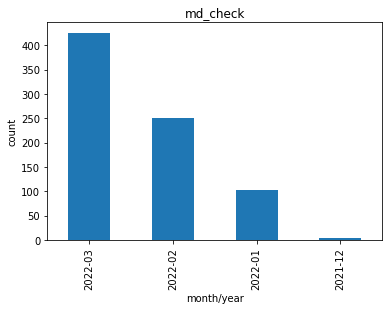

In [15]:
md_check = cnn_ukraine['month_year'].value_counts().plot(kind='bar')
md_check.set_title("md_check")
md_check.set_xlabel("month/year")
md_check.set_ylabel("count")

Timeframe in dataset is already equal to the rest